In [1]:
%%capture
# 1. 한글 폰트 설치 (코랩 환경에서 필수)
!sudo apt-get install -u fonts-nanum* -y
!rm -rf ~/.cache/matplotlib/*

# 폰트 설치 후 상단 메뉴 [런타임] -> [런타임 다시 시작]을 눌러주세요.

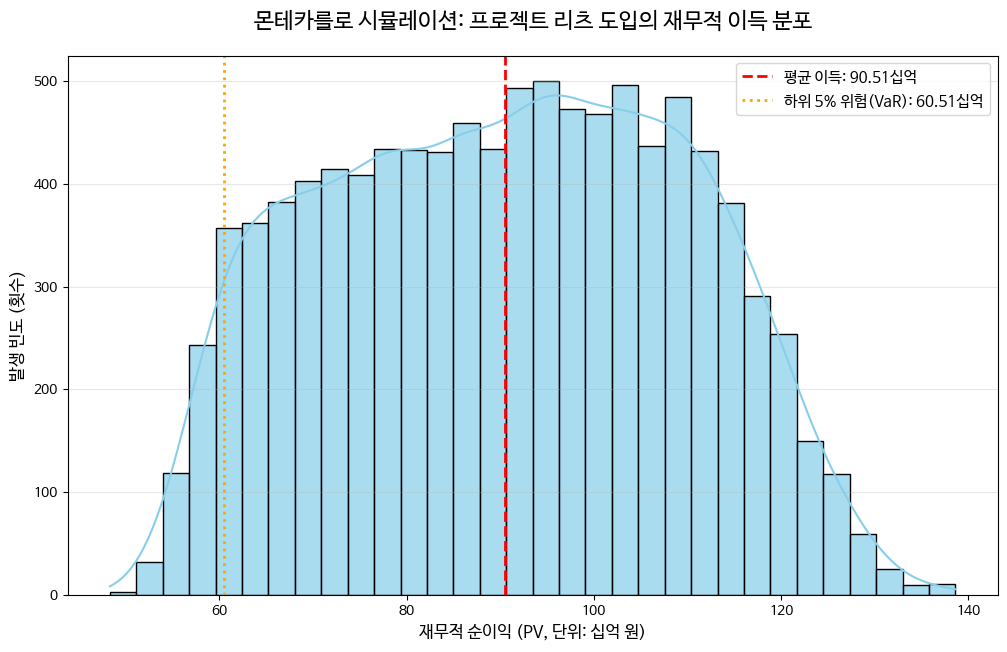

--- 시뮬레이션 분석 보고서 (N=10000) ---
기대 수익(Mean): 90.51 십억 원
최대 수익(Max): 138.63 십억 원
최소 수익(Min): 48.30 십억 원
리스크 지표(95% Confidence VaR): 60.51 십억 원


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. 한글 폰트 및 그래픽 설정
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

# 3. 재무 시뮬레이션 엔진 (Phase 2 로직 반영)
def calculate_reits_benefit(asset_value, cost_basis, tax_rate=0.2, discount_rate=0.05, years=5):
    immediate_tax = (asset_value - cost_basis) * tax_rate
    deferred_tax_pv = immediate_tax / ((1 + discount_rate) ** years)
    return immediate_tax - deferred_tax_pv

# 4. 시뮬레이션 파라미터 설정 (10,000회)
n_simulations = 10000
current_asset_val = 2602.81  # 2024년 말 실측 데이터 기준
cost_basis = 500.00          # 취득원가 가정치

# 변동성 변수 생성: 자산가치(연 5% 변동성), 할인율(3%~7% 균등분포)
v_asset_values = np.random.normal(current_asset_val, current_asset_val * 0.05, n_simulations)
v_discount_rates = np.random.uniform(0.03, 0.07, n_simulations)

# 5. 시뮬레이션 실행
results = [calculate_reits_benefit(v_asset_values[i], cost_basis, discount_rate=v_discount_rates[i])
           for i in range(n_simulations)]

# 6. 결과 시각화
plt.figure(figsize=(12, 7))
sns.histplot(results, kde=True, color='skyblue', edgecolor='black', alpha=0.7)

# 평균 및 위험 지표(VaR 5%) 표시
mean_val = np.mean(results)
var_5pct = np.percentile(results, 5)

plt.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'평균 이득: {mean_val:.2f}십억')
plt.axvline(var_5pct, color='orange', linestyle=':', linewidth=2, label=f'하위 5% 위험(VaR): {var_5pct:.2f}십억')

plt.title('몬테카를로 시뮬레이션: 프로젝트 리츠 도입의 재무적 이득 분포', fontsize=16, pad=20)
plt.xlabel('재무적 순이익 (PV, 단위: 십억 원)', fontsize=12)
plt.ylabel('발생 빈도 (횟수)', fontsize=12)
plt.legend(fontsize=11)
plt.grid(axis='y', alpha=0.3)
plt.show()

# 7. 통계 요약 보고
print(f"--- 시뮬레이션 분석 보고서 (N={n_simulations}) ---")
print(f"기대 수익(Mean): {mean_val:.2f} 십억 원")
print(f"최대 수익(Max): {np.max(results):.2f} 십억 원")
print(f"최소 수익(Min): {np.min(results):.2f} 십억 원")
print(f"리스크 지표(95% Confidence VaR): {var_5pct:.2f} 십억 원")